# 2) Supervised Learning
+ [2.1) Classification and Regression](#2.1)
+ [2.2) Generalization, Overfitting and Underfitting](#2.2)
+ [2.3) Supervised Learning Algorithms](#2.3)
    + [Some Sample datasets](#2.3.1)
    + [KNN - K Nearest Neighbors (Classification and Regression)](#knn)
    + [Linear Models](#linear)
    + [Naive Bayes Classifiers](#naivebayes)
    + [Decision Trees](#decisiontrees)
    + [Ensembles of Decision Trees](#ensembles)
    + [Kernelized Support Vector Machines](#svm)
    + [Neural Networks (Deep Learning)](#neuralnetwork)

# <a name=2.1>2.1) Classification and Regression</a>

There are two major types of Supervised Machine Learning problems:
+ Classification
+ Regression



#### 2.1) Classification
The goal is to predict a class label, which is a choice from a predefined list of possibilities.
There are two types of Classification.
+ Binary Classification: distinguish between exactly two classes (Example: spam or no-spam / Yes or No)
+ Multiclass Classification (Example: predicting what species among 3 different iris flowers)



#### 2.1) Regression
The goal is to predict a continuous number, or a floating point number. (Example: predicting a person's annual income from their education, age, location OR predicting a corn farm's yield given attributes such as previous yields, weather, and number of employees working on the farm)

---------
 
# <a name=2.2>2.2) Generalization, Overfitting and Underfitting</a>

In supervised learning, we want to build a model on the training data and then be able to make accurate predictions on new, unseen data that has the same characteristics as the training set that we used. If a model is able to make accurate predictions on unseen data, we say it is able to **generalize** from the training set to the test set. We want to build a model that is able to generalize as accurately as possible.

**Overfitting** occurs when you fit a model too closely to the particularities of the training set and obtain a model that works well on the training set but is not able to generalize to new data. Building a model that is too complex for the amount of information we have, can lead to overfitting.

On the other hand, if your model is too simple, then you might not be able to capture all the aspects of and variability in the data, and your model will do badly even on the training set. Choosing too simple a model is called **underfitting**.


There is a sweet spot in between that will yield the best generalization performance. This is the model we want to find.

![model_complexity](images/overfitting_underfitting_cartoon.png)

--------

### 2.2.1) Relation of Model Complexity to Dataset Size
It’s important to note that model complexity is intimately tied to the variation of inputs contained in your training dataset: the larger variety of data points your dataset contains, the more complex a model you can use without overfitting. Usually, collecting more data points will yield more variety, so larger datasets allow building more complex models. However, simply duplicating the same data points or collecting very similar data will not help.

--------

# <a name=2.3>2.3) Supervised Learning Algorithms</a>

# <a name=2.3.1>2.3.1) Some Sample datasets</a>

In [1]:
from preamble import *

In [2]:
# import os
# import sys

# module_path = os.path.abspath(os.path.join('./mglearn/'))
# print(module_path)

# if module_path not in sys.path:
#     print('appending')
#     sys.path.append(module_path)

# import mglearn

### Example dataset with 2 features

#### Demo

In [3]:
# generate dataset
X, y = mglearn.datasets.make_forge()

X shape:  (26, 2)


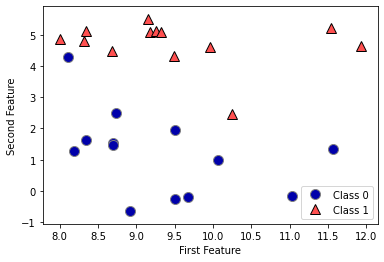

In [4]:
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['Class 0', 'Class 1'])
plt.xlabel('First Feature')
plt.ylabel('Second Feature')

print('X shape: ', X.shape)

### Dataset with Single input feature and Continuous target variable

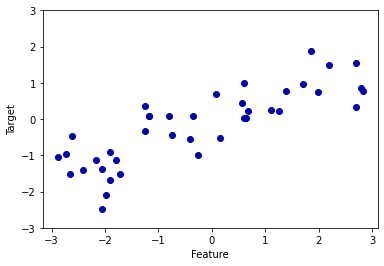

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target');

**NOTE:** Any Intuition derived from datasets with few features (**low dimensional** datasets) might not hold in datasets with many features (**high dimensional** datasets).

------

## Real World datasets

### Breast Cancer Dataset for Classification
contains records of clinical measurements of breast cancer tumors. Each tumor is labeled as 'benign' or 'maglinant'.

The task is to learn to predict whether the tumor is maglinant based on the measurement of the tissue.

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

note: datasets in sklearn are stored as Bunch objects and we can acces values using key.

In [9]:
print('Shape of cancer data: ', cancer['data'].shape)

Shape of cancer data:  (569, 30)


In [10]:
print('sample count per class: \n', 
      {n: v for n, v in zip(cancer['target_names'], np.bincount(cancer['target']))}
     )

sample count per class: 
 {'malignant': 212, 'benign': 357}


There are 212 maligant data points and 357 benigh datapoints out of 569.

In [11]:
np.bincount(cancer['target'])

array([212, 357], dtype=int64)

In [12]:
# to get the feature names
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

------

### Boston Housing dataset for Regression

In [13]:
from sklearn.datasets import load_boston

In [14]:
boston = load_boston()

In [15]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [16]:
print('Data shape: ', boston['data'].shape)

Data shape:  (506, 13)


#### Extended dataset of Boston
In this dataset, we not only consider the original 13 features, but also looking at all the products (interactions) between the features.

Example: we will not only consider `crime rate` and `highway accessibility`, but also the product of those two features.

In [17]:
X, y = mglearn.datasets.load_extended_boston()

In [18]:
print('X shape: ', X.shape)

X shape:  (506, 104)


------

# <a name=knn>2.3.2) k-Nearest Neighbors</a>

When making predictions for new data points, the algorithm finds the **closest data points** in the training set (its **nearest neighbors**).

When considering more than one neighbor, we use **voting** to assign a label. 

This means that for each test point, we count how many neighbors belong to class 0 and how many neighbors belong to class 1. We then assign the class that is more frequent: in other words, the **majority class among the k-nearest neighbors**. 

## K-Neighbors Classification

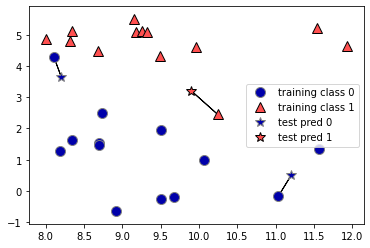

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

# in this case, only 1 closest neighbor is considered to assign the class of new points.

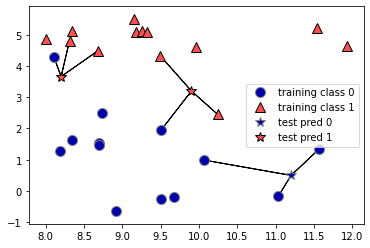

In [20]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

# not it used the voting of 3 nearest neighbors 
# (we can see the left left star point is now voted as red because there are only 1 blue neighbor and 2 red neighbors)

### Using sklearn for K-Neighbors

#### Split the data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X, y = mglearn.datasets.make_forge()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Model building

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [26]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
print('Test predictions:', knn_clf.predict(X_test))

Test predictions: [1 0 1 0 1 0 0]


#### Evaluation

In [28]:
print('Test set Accuracy: {:.2f}'.format(knn_clf.score(X_test, y_test)))

Test set Accuracy: 0.86


-------

## Analyzing K-Neighbors Classifier

We can view the **decision boundary** which is the divide between where the algorithm decides between class 0 and class 1.

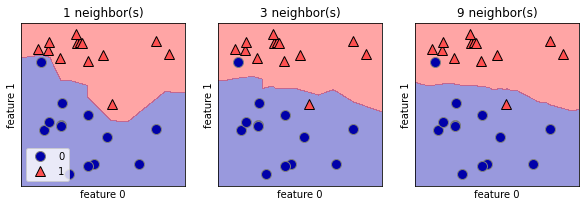

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf = knn_clf.fit(X, y) # fit method returns the object self,
    
    mglearn.plots.plot_2d_separator(knn_clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3);

#### For KNN, 

+ **Low number of neighbors => High Complexity**
+ **High number of neighbors => Low Complexity**

### using Breat Cancer Dataset

In [31]:
from sklearn.datasets import load_breast_cancer

In [32]:
cancer = load_breast_cancer()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify=cancer['target'], random_state=66)

In [34]:
training_accuracy = []
test_accuracy = []

number_of_neighbors = range(1, 11)

for n_neighbors in number_of_neighbors:
    knn_clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_clf.fit(X_train, y_train)
    
    # get accuracy
    training_accuracy.append(knn_clf.score(X_train, y_train)) # training accuracy
    test_accuracy.append(knn_clf.score(X_test, y_test)) # generalization accuracy

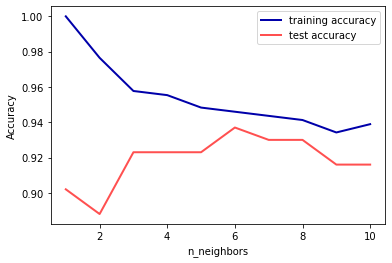

In [35]:
# plot out the findings
plt.plot(number_of_neighbors, training_accuracy, label='training accuracy')
plt.plot(number_of_neighbors, test_accuracy, label='test accuracy')

plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend();

+ Low number of neighbors => High Complexity (we can see that, at 1 n_neighbor it is perfect accuracy for training set which is overfitting)
+ High number of neighbors => Low Complexity

Considering a single nearest neighbor, the predictionon the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to amodel that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors.Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

--------
--------

## K-Neighbors Regression

Starting with single nearest neighbor...

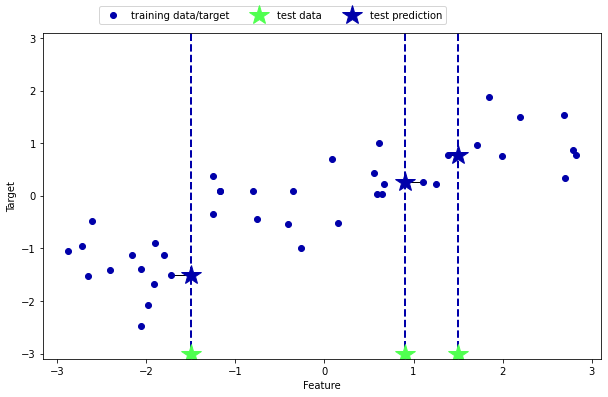

In [36]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

using neighbors of 3

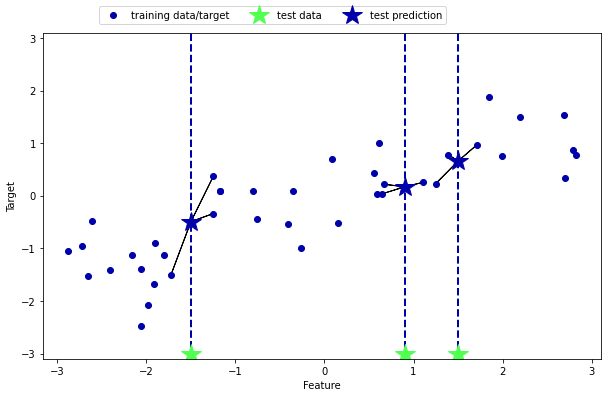

In [37]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

#### using sklearn

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [39]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [40]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [41]:
# modelling
knn_reg = KNeighborsRegressor(n_neighbors=3)

In [42]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [43]:
print('Test Set Predictions: ', knn_reg.predict(X_test))

Test Set Predictions:  [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


### Evaluation of Regression model
+ we can evaluate the model using `score()` method, which is regressors returns the R^2 score.
+ R^2 is the coefficient of determination, a measure of goodness of a prediction for regression model, yields score between 0 and 1.
+ 1 means perfect prediction and value of 0 corresponds to a constant model that just predicts the mean of the training set responses, y_train
+ The formulation of R2 used here can even be negative, which can indicate anticorrelated predictions.

In [44]:
print('Test Set R^2: {:.2f}'.format(knn_reg.score(X_test, y_test)))

Test Set R^2: 0.83


here we have 0.83 which is relatively good fit.

## Analyzing K Neighbors Regressor

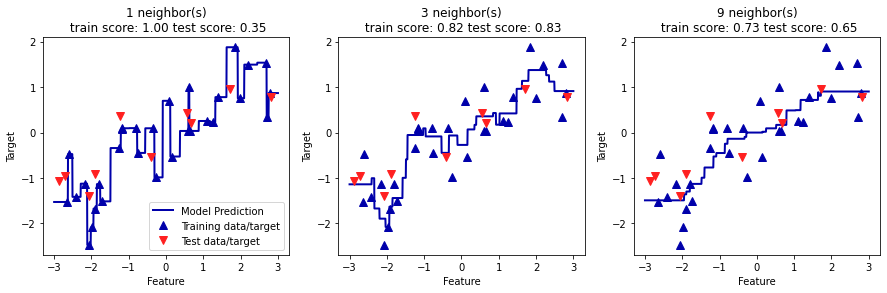

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# create 1,000 data points evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions uising 1, 3, 9 neighbors
    knn_reg = KNeighborsRegressor(n_neighbors)
    knn_reg.fit(X_train, y_train)
    
    prediction = knn_reg.predict(line)
    
    ax.plot(line, prediction)
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        '{} neighbor(s)\n train score: {:.2f} test score: {:.2f}'.format(
            n_neighbors, knn_reg.score(X_train,y_train), knn_reg.score(X_test, y_test)
        )
    )
    
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')

axes[0].legend(['Model Prediction', 'Training data/target', 'Test data/target'], loc='best');


We can see that for 1 neighbor, the model is picking up all the noises from training set. The more neighbors it gets, the line gets smoother but it doesn't fit the training data as well.

-------

## Strengths, Weaknesses and Parameters

#### Parameters
two important parameters for K Nearest Neighbors Classifier:
+ **number of neighbors**
+ **how you measure the distance between data points (default is Euclidean distance, which works well for many settings)**

#### Strength
- easy to understand
- often give reasonable performance without a lot of adjustments.
- can be used as baseline method to try (before considering more advanced techniques)
- buidling is very fast

#### Weakness
- can be slow to predict when training set is very large (either in number of features or number of samples)
- IMPORTANT TO PREPROCESS the data before using knn
- does particularly badly with datasets where most features are 0 most of the time (so called sparse datasets)

**In practice, knn is not often used even though it is easy to understand due to prediction slow and its inability to handle many features.**

-------
------
-----

# <a name=linear>2.3.3) Linear Models</a>
widly used in practice and use linear function to make predictions.

# Linear Model for Regression
+ [Simple Linear Regerssion (Oridinary Least Squares)](#ols)
+ [Ridge Regression](#ridge)


--------
`ŷ = w[0] * x[0] + b`

x: features

w, b : parameters of model that are learned

ŷ : prediction that model makes


In Linear Regression model, predictions is
+ a line for single feature
+ a plane when using two features
+ hyperplane in higher dimensions (more features)

#### demo - using one dimensional wave dataset

w[0]: 0.393906  b: -0.031804


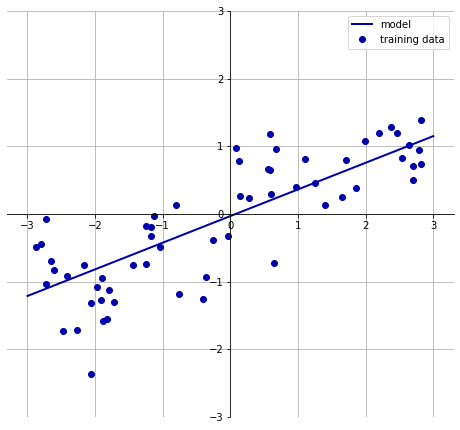

In [46]:
mglearn.plots.plot_linear_regression_wave() # trying to learn w[0], b

------

## <a name=ols> Linear Regression (aka Oridinary Least Squares)</a>
+ simplest and classic linear method for regression
+ finds the parameters `w` and `b`that minize the `mean squared error` between predictions and true values
+ `MSE`: sum of squared differences between predictions and actual values / divied by number of samples
+ **no parameters to tune**

In [ ]:
from sklearn.linear_model import LinearRegression

#### using wave data

In [ ]:
X, y = mglearn.datasets.make_wave(n_samples=60)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
print('Slope: ', lr.coef_)
print('Y Intercept: ', lr.intercept_)

**NOTE: `Intercept` value is always single value. `Coefficient` attribute is a numpy array with one entry per input features.**

In this case we have only 1 feature, so coefficient is single entry.

In [ ]:
# performance
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Testing set score: {:.2f}'.format(lr.score(X_test, y_test)))

R^2 score of 66 is not very good. But we can see training and test score are very similar which means we are likly underfitting.

--------

#### using Boston Data

remember that this dataset has 506 samples and 104 derived features.

In [ ]:
X, y = mglearn.datasets.load_extended_boston()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

In [ ]:
# performance
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
print('Testing set score: {:.2f}'.format(lr.score(X_test, y_test)))

As linear regression can tends to overfit when there are a lot of features, we need to take note of that.

We can see that training score is much better than Test score which is a clear sign of overfitting.

Therefore we need to find a model that allows us to control the complexity, which is next Ridge Regression.

-------

## <a name=ridge>Ridge Regression</a>
+ use the same formula, used by Oridinary Least Squares
+ In ridge regression, though, the `coefficient (w)` are chosen not only so that they predict well on the training data, but also fit an additional contraints
+ we also want the mangnitude of coefficents to be **as small as possible**; in other words, all entries of `w` should be close to zero.
    + meaning: each feature should have little effect on the outcome as possible (having  a small slope) while still predicting well.
    + this constraint is an example of **regularization**.
    
#### Regularization
+ means explicitly restricting a model to avoid overfitting.
+ particular kind used by Ridge Regression is known as **L2 Regularization**.

#### using Boston data

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge() # default alpha value=1.0

In [ ]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
ridge.fit(X_train, y_train)

In [ ]:
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
print('Testing set score: {:.2f}'.format(ridge.score(X_test, y_test)))

<p>
As we can see that with Ridge Regression, training score (0.89) is lower than for Linear Regression (0.95) while the test score is higher.<br>
This is consistent with our expection (with Linear Regression, we were overfitting the data).
    
**Ridge is a more restricted model, so we are less likely to overfit.**

>A less complex model means worse performance on the training set, but better generalization. As we are only interested in generalization performance, we should choose Ridge Regression model over Linear Regression model.
</p>

--------

##  Ridge Regression Trade off
+ Ridge Regression model trades off between the **simpilcity of the model (nearly zero coefficients) and its performance on the training set**.
+ but this trade off can be specified by user using `alpha parameter`: default is `1.0`
    + The optimum setting of alpha depends on the particular dataset we are using
    + **Increasing alpha forces  makes the following =>:** 
        + coefficients move towards 0 zero
        + decreases training set performance
        + might help generalization

In [ ]:
# using alpha value of 10
ridge10 = Ridge(alpha=10)

ridge10.fit(X_train, y_train)

print('Training Trianing Score: {:.2f}'.format(ridge10.score(X_train, y_train)))
print('Training Test Score: {:.2f}'.format(ridge10.score(X_test, y_test)))

In [ ]:
# using alpha value of 0.1
ridge01 = Ridge(alpha=0.1)

ridge01.fit(X_train, y_train)

print('Training Trianing Score: {:.2f}'.format(ridge01.score(X_train, y_train)))
print('Training Test Score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Here `alpha=0.1` seems to be working well. We could try decreasing alpha even more to improve generalization.

### How `alpha` parameter changes the model by inspecting `coef_` attributes of models using different alpha values
+ Higher alpha means a more restricted model: meaning the entries of `coef_` to have smaller values (bringing them close to zero)

In [ ]:
plt.figure(figsize=(12,8), dpi=120)

plt.plot(ridge.coef_, 's', label='Ridge alpah=1') #shape square: s
plt.plot(ridge10.coef_, '^', label='Ridge alpah=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpah=0.01')

plt.plot(lr.coef_, 'o', label='Linear Model')

plt.xlabel('Coefficient Index') # basically these are for each features
plt.ylabel('Coefficient magnitude')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()